<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


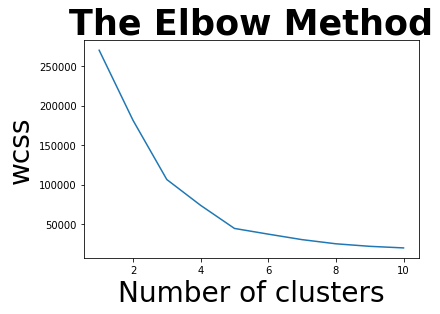

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


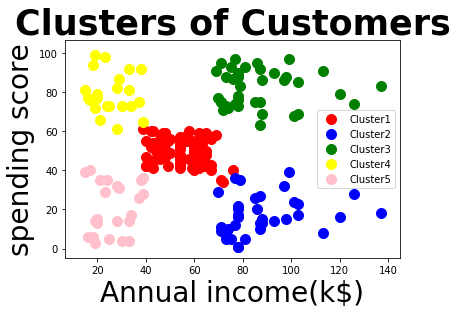

In [3]:
#Mall Customers - Unsupervised Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('C:\\Users\\vardh\\Vardhan\\Applied Marketing (6615)\\customer-segmentation-tutorial-in-python\\Mall_Customers.csv')
df = dataset.copy()

# Visualizing data
df.head()


# GEtting the insides of the data
df.isnull().sum()
df.describe()
df.info()

# Making  the independent variables matrix
X = df.iloc[:, [3, 4]].values

# One Hot Encoding the categorical data - Gender
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

#Using KMeans for clustering
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}


#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', **font_title)
plt.xlabel('Number of clusters', **font_axes)
plt.ylabel('wcss', **font_axes)
plt.show()

#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()
#K-Means Clustering Python Code Sample.txt
#Displaying K-Means Clustering Python Code Sample.txt.